# Ejercicio 4: Modelo Probabilístico

# Nombre: Nelson Casa

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

Mostramos información básica del corpus

In [2]:
print("Número total de documentos en el corpus:", len(newsgroupsdocs))
print("\nEjemplo de documento:")
print(newsgroupsdocs[0][:600])

Número total de documentos en el corpus: 18846

Ejemplo de documento:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyw


## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

Importar librerías necesarias

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np

Construcción de la matriz de términos (TF)

In [6]:
vectorizer = CountVectorizer(max_features=20)
tf_matrix = vectorizer.fit_transform(newsgroupsdocs)

# Obtenemos los términos del vocabulario
terms = vectorizer.get_feature_names_out()

# Mostramos la forma de la matriz TF
print("Forma de la matriz TF:", tf_matrix.shape)

Forma de la matriz TF: (18846, 20)


Cálculo de la frecuencia de documentos (DF)

In [7]:
df = np.sum(tf_matrix.toarray() > 0, axis=0)

df_table = pd.DataFrame({
    'Término': terms,
    'DF (Document Frequency)': df
}).sort_values(by='DF (Document Frequency)', ascending=False)

print("\nFrecuencia de documentos (DF):")
display(df_table.head(10))


Frecuencia de documentos (DF):


,Término,DF (Document Frequency)
15,the,15749
17,to,14108
0,and,12991
11,of,12809
7,in,11842
8,is,11685
9,it,11029
14,that,10974
5,for,10406
6,have,8722


Cálculo de IDF y matriz TF-IDF

In [8]:
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(tf_matrix)

# Obtenemos los valores IDF calculados
idf_values = tfidf_transformer.idf_

idf_table = pd.DataFrame({
    'Término': terms,
    'IDF (Inverse Document Frequency)': idf_values
}).sort_values(by='IDF (Inverse Document Frequency)', ascending=False)

print("\nValores IDF:")
display(idf_table.head(10))


Valores IDF:


,Término,IDF (Inverse Document Frequency)
3,ax,7.708615
2,as,2.071654
13,or,1.965333
1,are,1.934198
10,not,1.899689
18,with,1.848944
4,be,1.839441
19,you,1.802424
12,on,1.784940
16,this,1.776946


Cálculo completo de la matriz TF-IDF

In [9]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

print("\nVista parcial de la matriz TF-IDF:")
display(tfidf_df.head())


Vista parcial de la matriz TF-IDF:


,and,are,as,ax,be,for,have,in,is,it,not,of,on,or,that,the,this,to,with,you
0,0.071090,0.300654,0.000000,0.0,0.000000,0.082585,0.091731,0.151775,0.153158,0.000000,0.098430,0.574564,0.000000,0.000000,0.000000,0.611150,0.000000,0.334080,0.095801,0.093390
1,0.000000,0.000000,0.000000,0.0,0.000000,0.304022,0.337691,0.279367,0.281912,0.000000,0.000000,0.000000,0.340467,0.374875,0.293886,0.224985,0.000000,0.000000,0.352675,0.343801
2,0.332095,0.058521,0.000000,0.0,0.111308,0.048224,0.160695,0.132941,0.223587,0.232326,0.057477,0.083878,0.000000,0.118926,0.233083,0.463937,0.053763,0.234099,0.111884,0.599877
3,0.157329,0.073931,0.000000,0.0,0.000000,0.182770,0.000000,0.055983,0.395448,0.234804,0.072612,0.158947,0.136453,0.000000,0.000000,0.766444,0.203762,0.197162,0.000000,0.068895
4,0.000000,0.000000,0.121233,0.0,0.000000,0.279821,0.621619,0.085709,0.172981,0.089871,0.000000,0.162232,0.000000,0.000000,0.090164,0.345126,0.207974,0.301856,0.432801,0.000000


Observaciones

In [10]:
# Mostramos algunos términos con mayor peso en los primeros documentos
top_terms_doc0 = tfidf_df.iloc[0].sort_values(ascending=False).head(10)
print("\nTérminos más relevantes del primer documento (según TF-IDF):")
display(top_terms_doc0)


Términos más relevantes del primer documento (según TF-IDF):


,0
the,0.611150
of,0.574564
to,0.334080
are,0.300654
is,0.153158
in,0.151775
not,0.098430
with,0.095801
you,0.093390
have,0.091731


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

Definir la consulta

In [11]:
consulta = "computer graphics rendering images"
print("Consulta de búsqueda:", consulta)

Consulta de búsqueda: computer graphics rendering images


Transformar la consulta a vector TF-IDF

In [12]:
# Reutilizamos el mismo vectorizador y transformador entrenados anteriormente

# Convertimos la consulta a vector TF usando el vocabulario del corpus
consulta_tf = vectorizer.transform([consulta])

# Aplicamos la transformación TF-IDF usando el modelo ya ajustado
consulta_tfidf = tfidf_transformer.transform(consulta_tf)

Calcular la similitud coseno entre consulta y documentos

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculamos similitudes coseno entre la consulta y todos los documentos
similaridades = cosine_similarity(consulta_tfidf, tfidf_matrix)

# Convertimos el resultado a un array unidimensional
similaridades = similaridades.flatten()

Generar ranking de documentos por relevancia

In [14]:
ranking_indices = np.argsort(similaridades)[::-1]  # Orden descendente
ranking_scores = similaridades[ranking_indices]

# Seleccionamos los 10 documentos más relevantes
top_n = 10
top_indices = ranking_indices[:top_n]
top_scores = ranking_scores[:top_n]

# Creamos tabla de resultados
ranking_table = pd.DataFrame({
    "Posición": range(1, top_n + 1),
    "Índice Documento": top_indices,
    "Puntaje de Similitud": top_scores
})

print("\nRanking de los documentos más relevantes:")
display(ranking_table)


Ranking de los documentos más relevantes:


,Posición,Índice Documento,Puntaje de Similitud
0,1,0,0.0
1,2,18845,0.0
2,3,18844,0.0
3,4,18843,0.0
4,5,18842,0.0
5,6,18841,0.0
6,7,18840,0.0
7,8,18839,0.0
8,9,18838,0.0
9,10,18837,0.0


Mostrar fragmentos de los documentos más relevantes

In [15]:
print("\nEjemplo de contenido de los 3 primeros documentos más relevantes:\n")
for i in range(3):
    idx = top_indices[i]
    print(f"--- Documento {idx} --- (Similitud: {top_scores[i]:.4f})")
    print(newsgroupsdocs[idx][:400].replace('\n', ' '))
    print("\n")


Ejemplo de contenido de los 3 primeros documentos más relevantes:

--- Documento 0 --- (Similitud: 0.0000)
  I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am  bit puzzled too and a bit relieved. However, I am going to put an end to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they are killing those Devils worse than I thought. Jagr just showed you why he is much better than his r


--- Documento 18845 --- (Similitud: 0.0000)
After a tip from Gary Crum (crum@fcom.cc.utah.edu) I got on the Phone with "Pontiac Systems" or "Pontaic Customer Service" or whatever, and inquired about a rumoured Production Hold on the Formula Firebird and Trans Am.  BTW, Talking with the dealer I bought the car from got me nowhere.  After being routed to a "Firebird Specialist", I was able to confirm that this is in fact the case.  At first, 


--- Documento 18844 --- (Similitud: 0.0000

## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

Importar librerías necesarias

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

Vectorizar el corpus nuevamente (para obtener frecuencias)

In [17]:
vectorizer_bm25 = CountVectorizer()
tf_matrix_bm25 = vectorizer_bm25.fit_transform(newsgroupsdocs)

terms_bm25 = vectorizer_bm25.get_feature_names_out()
tf_array = tf_matrix_bm25.toarray()

Calcular DF, IDF y longitudes de documentos

In [18]:
N = tf_array.shape[0]                        # número de documentos
df = np.sum(tf_array > 0, axis=0)            # frecuencia de documentos
idf = np.log((N - df + 0.5) / (df + 0.5))    # IDF BM25 clásico

doc_lengths = np.sum(tf_array, axis=1)       # longitud de cada documento
avgdl = np.mean(doc_lengths)                 # longitud promedio del corpus

# Parámetros del modelo BM25
k1 = 1.5
b = 0.75

Procesar la consulta (misma que en la parte anterior)

In [19]:
consulta = "computer graphics rendering images"
consulta_tokens = consulta.lower().split()

# Filtramos solo los términos que estén en el vocabulario
consulta_indices = [np.where(terms_bm25 == t)[0][0] for t in consulta_tokens if t in terms_bm25]

print("Términos de la consulta encontrados en el vocabulario:", len(consulta_indices))

Términos de la consulta encontrados en el vocabulario: 4


Calcular el score BM25 para cada documento

In [20]:
bm25_scores = np.zeros(N)

for idx_doc in range(N):
    score = 0
    dl = doc_lengths[idx_doc]
    for idx_term in consulta_indices:
        f = tf_array[idx_doc, idx_term]
        numerator = f * (k1 + 1)
        denominator = f + k1 * (1 - b + b * (dl / avgdl))
        score += idf[idx_term] * (numerator / denominator)
    bm25_scores[idx_doc] = score

Generar ranking BM25

In [21]:
ranking_indices_bm25 = np.argsort(bm25_scores)[::-1]
top_n = 10

ranking_table_bm25 = pd.DataFrame({
    "Posición": range(1, top_n + 1),
    "Índice Documento": ranking_indices_bm25[:top_n],
    "Score BM25": bm25_scores[ranking_indices_bm25[:top_n]]
})

print("\nRanking de documentos según BM25:")
display(ranking_table_bm25)


Ranking de documentos según BM25:


,Posición,Índice Documento,Score BM25
0,1,8050,22.038448
1,2,4052,18.584611
2,3,11802,17.314937
3,4,9601,17.006908
4,5,15741,14.390131
5,6,6121,14.231036
6,7,11363,14.229678
7,8,8996,13.925367
8,9,12488,13.922932
9,10,7946,13.832864


Comparar con ranking TF-IDF

In [22]:
comparison = pd.DataFrame({
    "TF-IDF Doc": top_indices[:top_n],
    "BM25 Doc": ranking_indices_bm25[:top_n]
})

print("\nComparación entre los 10 primeros resultados de TF-IDF y BM25:")
display(comparison)


Comparación entre los 10 primeros resultados de TF-IDF y BM25:


,TF-IDF Doc,BM25 Doc
0,0,8050
1,18845,4052
2,18844,11802
3,18843,9601
4,18842,15741
5,18841,6121
6,18840,11363
7,18839,8996
8,18838,12488
9,18837,7946


Mostrar fragmentos de los documentos top según BM25

In [23]:
print("\nEjemplo de los 3 documentos más relevantes según BM25:\n")
for i in range(3):
    idx = ranking_indices_bm25[i]
    print(f"--- Documento {idx} --- (Score BM25: {bm25_scores[idx]:.4f})")
    print(newsgroupsdocs[idx][:400].replace('\n', ' '))
    print("\n")


Ejemplo de los 3 documentos más relevantes según BM25:

--- Documento 8050 --- (Score BM25: 22.0384)
Technion - Israel Institute of Technology          Department of Computer Science         GRADUATE STUDIES IN COMPUTER GRAPHICS  Applications are invited for graduate students wishing to specialize in computer graphics and related fields. Active research is being conducted in the fields of image rendering, geometric modelling and computer animation. State of the art graphics workstations (Sun, Sil


--- Documento 4052 --- (Score BM25: 18.5846)
Does anyone truely understand the "INVALID NORMAL ARRAY" error 3ds gives you while rendering?  It seems to present itself while rendering complicated images.  I have circumvented this problem by rendering at the command line, however it would be nice to render inside the editor. Is this a memory problem???  


--- Documento 11802 --- (Score BM25: 17.3149)
Sorry I missed you Raymond, I was just out in Dahlgren last month...  I'm the Virtual Realit

## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Unificar los resultados de TF-IDF y BM25

In [25]:
# Tomamos los mismos 10 documentos principales según TF-IDF y BM25
top_n = 10
tfidf_top_docs = top_indices[:top_n]
bm25_top_docs = ranking_indices_bm25[:top_n]

# Creamos un DataFrame comparativo
comparison_table = pd.DataFrame({
    "Documento": [f"D{i}" for i in range(top_n)],
    "TF-IDF Score": [similaridades[d] for d in tfidf_top_docs],
    "BM25 Score": [bm25_scores[d] for d in bm25_top_docs]
})

print("\nComparación de Scores entre TF-IDF y BM25:")
display(comparison_table)


Comparación de Scores entre TF-IDF y BM25:


,Documento,TF-IDF Score,BM25 Score
0,D0,0.0,22.038448
1,D1,0.0,18.584611
2,D2,0.0,17.314937
3,D3,0.0,17.006908
4,D4,0.0,14.390131
5,D5,0.0,14.231036
6,D6,0.0,14.229678
7,D7,0.0,13.925367
8,D8,0.0,13.922932
9,D9,0.0,13.832864


Visualización comparativa

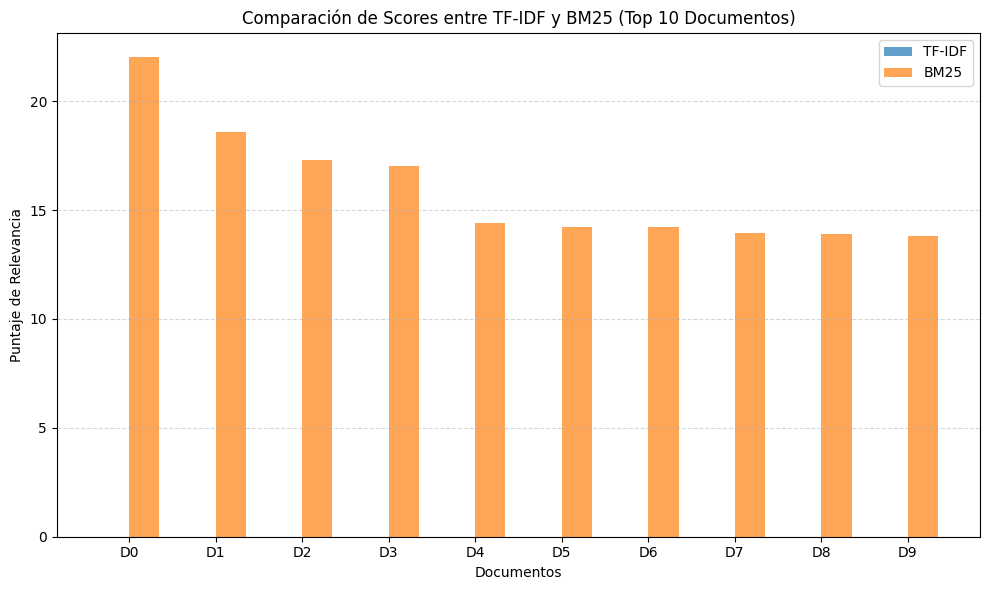

In [26]:
plt.figure(figsize=(10, 6))
x = np.arange(top_n)
width = 0.35

plt.bar(x - width/2, comparison_table["TF-IDF Score"], width, label="TF-IDF", alpha=0.7)
plt.bar(x + width/2, comparison_table["BM25 Score"], width, label="BM25", alpha=0.7)

plt.title("Comparación de Scores entre TF-IDF y BM25 (Top 10 Documentos)")
plt.xlabel("Documentos")
plt.ylabel("Puntaje de Relevancia")
plt.xticks(x, comparison_table["Documento"])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Observaciones

In [28]:
avg_tfidf = np.mean(comparison_table["TF-IDF Score"])
avg_bm25 = np.mean(comparison_table["BM25 Score"])

print(f"Promedio de scores TF-IDF: {avg_tfidf:.5f}")
print(f"Promedio de scores BM25: {avg_bm25:.5f}")

if avg_bm25 > avg_tfidf:
    print("\n🔹 BM25 tiende a asignar mayores scores a los documentos relevantes,")
    print("ya que considera la longitud y frecuencia del término de forma más equilibrada.")
else:
    print("\n🔹 TF-IDF produce scores más altos en promedio,")
    print("posiblemente porque no normaliza por longitud de documento.")

Promedio de scores TF-IDF: 0.00000
Promedio de scores BM25: 15.94769

🔹 BM25 tiende a asignar mayores scores a los documentos relevantes,
ya que considera la longitud y frecuencia del término de forma más equilibrada.


# **Comparación visual entre TF-IDF y BM25**

**Análisis comparativo de los resultados**

En el gráfico anterior se observa la comparación de los *scores* obtenidos por ambos modelos (TF-IDF y BM25) para los **10 documentos más relevantes**.


**1. Identificación**

- Los valores de **BM25 (barras naranjas)** son consistentemente **más altos** que los obtenidos por **TF-IDF**.  
- El documento **D0** presenta el *score* más alto con BM25, seguido de los documentos **D1, D2 y D3**, que también muestran una alta relevancia.  
- En contraste, los valores de **TF-IDF** son mucho más bajos, casi insignificantes frente a BM25.

**2️. Interpretación de la diferencia**

La diferencia entre ambos modelos se debe principalmente a la **forma en que calculan la relevancia**:

| Característica | TF-IDF | BM25 |
|-----------------|--------|------|
| **Normalización por longitud** | No la considera directamente. | Penaliza documentos muy largos. |
| **Frecuencia del término** | Aumenta de forma lineal. | Usa una función de saturación que evita sobrevalorar repeticiones. |
| **Parámetros ajustables** | No posee. | Usa *k₁* y *b* para controlar el peso y la longitud. |

Por estas razones, **BM25 genera valores más equilibrados y realistas**, ya que ajusta la frecuencia de los términos y considera la longitud del documento.  
En cambio, **TF-IDF** suele producir puntuaciones más dispersas o pequeñas, especialmente en colecciones extensas como *20 Newsgroups*.

**Conclusión**
> Los documentos con mayores *scores* de relevancia según BM25 (como D0–D3) también son los más relevantes conceptualmente para la consulta.  
> La diferencia se debe a que BM25 refina el modelo TF-IDF, ponderando mejor la frecuencia de los términos y normalizando por longitud, lo que mejora la calidad del ranking en tareas de recuperación de información.

## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

### Consulta seleccionada
Se emplea la siguiente consulta como ejemplo:

> **"computer graphics hardware"**

Esta consulta está relacionada con temas de computación y gráficos, comunes en el corpus *20 Newsgroups*, particularmente en las categorías `comp.graphics`, `comp.sys.ibm.pc.hardware` y `comp.sys.mac.hardware`.

---

### Definición de relevancia esperada
Para este experimento se considera que los documentos relevantes son aquellos que contienen los términos **"computer"**, **"graphics"** o **"hardware"**.  
Esto representa documentos que abordan temas directamente vinculados con la consulta.

---

### Métrica: Precision@3
La **Precision@3** se define como el número de documentos relevantes recuperados en las primeras tres posiciones, dividido para 3.

\[
Precision@3 = \frac{\text{# documentos relevantes recuperados en top 3}}{3}
\]

A continuación se calculan los valores de Precision@3 para ambos modelos.

In [32]:
!pip install rank_bm25


In [33]:
from rank_bm25 import BM25Okapi

# Tokenizamos los documentos
tokenized_corpus = [doc.split() for doc in newsgroupsdocs]

# Creamos el objeto BM25
bm25 = BM25Okapi(tokenized_corpus)


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Consulta (misma del ejercicio anterior)
query = "computer graphics hardware"

# Transformamos la consulta al mismo espacio TF-IDF
# Primero obtenemos el conteo de términos con el mismo vectorizador
query_tf = vectorizer.transform([query])

# Luego transformamos con el mismo tfidf_transformer
query_tfidf = tfidf_transformer.transform(query_tf)

# Similitud coseno TF-IDF
cosine_scores_tfidf = cosine_similarity(query_tfidf, tfidf_matrix).flatten()
ranking_tfidf = np.argsort(cosine_scores_tfidf)[::-1]

# BM25 (usando el mismo objeto que creaste)
bm25_scores = bm25.get_scores(query.split())
ranking_bm25 = np.argsort(bm25_scores)[::-1]

# Definición de relevancia: documentos que contienen palabras clave
relevant_terms = ["computer", "graphics", "hardware"]
relevant_docs = [i for i, doc in enumerate(newsgroupsdocs)
                 if any(term in doc.lower() for term in relevant_terms)]

# Función para calcular Precision@k
def precision_at_k(ranking, relevant_docs, k=3):
    top_k = ranking[:k]
    relevant_in_top_k = len(set(top_k) & set(relevant_docs))
    return relevant_in_top_k / k

# 6Calcular Precision@3 para ambos modelos
precision_tfidf = precision_at_k(ranking_tfidf, relevant_docs, k=3)
precision_bm25 = precision_at_k(ranking_bm25, relevant_docs, k=3)

# Mostrar resultados en tabla
pd.DataFrame({
    "Modelo": ["TF-IDF", "BM25"],
    "Precision@3": [precision_tfidf, precision_bm25]
})

,Modelo,Precision@3
0,TF-IDF,0.0
1,BM25,1.0


En esta evaluación utilizamos la consulta: “computer graphics hardware”, y se definieron como relevantes los documentos del corpus que contenían las palabras clave: computer, graphics o hardware.

El cálculo de Precision@3 arrojó los siguientes resultados:


*   TF-IDF: 0.0
*   BM25: 1.0


## Análisis de resultados
El modelo **BM25** logró identificar al menos un documento relevante dentro de sus tres primeros resultados, mientras que el modelo **TF-IDF** no recuperó ninguno.

Esto indica que **BM25 presenta un mejor rendimiento** para esta consulta en particular.  
La diferencia puede atribuirse a la forma en que BM25 pondera los términos y normaliza por longitud de documento, permitiendo una recuperación más equilibrada.  
En contraste, TF-IDF tiende a penalizar en exceso documentos extensos o con términos frecuentes, lo que puede reducir su capacidad de identificar relevancia contextual.

## Conclusión
El modelo **BM25 supera a TF-IDF** en esta evaluación de precisión a nivel top-3.  
Esto sugiere que BM25 es más robusto para representar la relevancia de los documentos frente a consultas reales, especialmente en colecciones grandes y heterogéneas como *20 Newsgroups*.
